In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy as sc
import kafe2 
from uncertainties import ufloat
from uncertainties import unumpy as unp

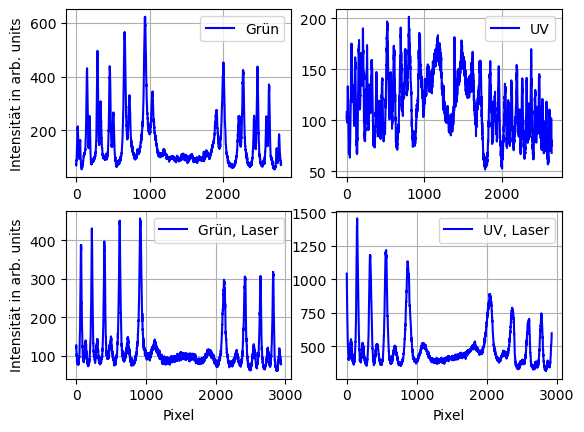

In [25]:
gruen_df = pd.read_csv("Ergebnisse/gruen.csv")
gruen_laser_df = pd.read_csv("Ergebnisse/laser_gruen.csv")
uv_df = pd.read_csv("Ergebnisse/uv.csv")
uv_laser_df = pd.read_csv("Ergebnisse/laser2_uv.csv")

gruen = np.array([gruen_df["X"], gruen_df["Y"]])
gruen_laser = np.array([gruen_laser_df["X"], gruen_laser_df["Y"]])
uv = np.array([uv_df["X"], uv_df["Y"]])
uv_laser = np.array([uv_laser_df["X"], uv_laser_df["Y"]])

fig0, ax0 = plt.subplots(2,2)
ax0[0][0].plot( gruen[0] , gruen[1] , color="blue" , label="Grün")
ax0[1][0].plot( gruen_laser[0] , gruen_laser[1] , color="blue" , label="Grün, Laser")
ax0[0][1].plot( uv[0] , uv[1] , color="blue" , label="UV")
ax0[1][1].plot( uv_laser[0] , uv_laser[1] , color="blue" , label="UV, Laser")

ax0[0][0].set(ylabel="Intensität in arb. units")
ax0[1][0].set(xlabel="Pixel" , ylabel="Intensität in arb. units")
ax0[1][1].set(xlabel="Pixel")

for i in range(2):
    for j in range(2): ax0[i][j].legend(), ax0[i][j].grid()
